# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Identify Today's Date
today = pd.to_datetime('today').normalize().strftime("%m-%d-%Y")
print(f"Today is: {today}")

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Today is: 03-04-2023
Number of cities in the list: 638


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key
units = "metric"

# Define Empty Data Frame to store city data
city_data_df = pd.DataFrame(columns=['City', 'Lat', 'Lng', 'Max Temp','Humidity', 'Cloudiness',
                                     'Wind Speed', 'Country', 'Date'])

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    time.sleep(1)    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_data = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_data['coord']['lat']
        city_lng = city_data['coord']['lon']
        city_max_temp = city_data['main']['temp_max']
        city_humidity = city_data['main']['humidity']
        city_clouds = city_data['clouds']['all']
        city_wind = city_data['wind']['speed']
        city_country = city_data['sys']['country']
        city_date = city_data['dt']

        # Append the City Data into city_data_df
        temp_df = pd.DataFrame({  "City": city, 
                                  "Lat": city_lat, 
                                  "Lng": city_lng, 
                                  "Max Temp": city_max_temp,
                                  "Humidity": city_humidity,
                                  "Cloudiness": city_clouds,
                                  "Wind Speed": city_wind,
                                  "Country": city_country,
                                  "Date": city_date},
                                                     index=[0])

        city_data_df = pd.concat([city_data_df, temp_df], axis=0,ignore_index=True)
        
    except:
        print("City not found. Skipping...")
        pass
        
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print(f"Data Retrieval Complete: Found {len(city_data_df)} of {len(cities)} Cities")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | hambantota
Processing Record 3 of Set 1 | puerto carreno
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | suleja
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | terrace bay
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | le moule
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | meiganga
Processing Record 14 of Set 1 | nishihara
Processing Record 15 of Set 1 | lavrentiya
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | souillac
Processing Record 19 of Set 1 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | isang

Processing Record 35 of Set 4 | udachnyy
Processing Record 36 of Set 4 | sao joao da barra
Processing Record 37 of Set 4 | victor harbor
Processing Record 38 of Set 4 | trincomalee
Processing Record 39 of Set 4 | skjervoy
Processing Record 40 of Set 4 | vardo
Processing Record 41 of Set 4 | jalu
Processing Record 42 of Set 4 | verkhnebakanskiy
Processing Record 43 of Set 4 | atar
Processing Record 44 of Set 4 | northam
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | jatibonico
Processing Record 47 of Set 4 | barabinsk
Processing Record 48 of Set 4 | plettenberg bay
Processing Record 49 of Set 4 | shulan
Processing Record 0 of Set 5 | hasaki
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | krasnovishersk
Processing Record 3 of Set 5 | bagan
Processing Record 4 of Set 5 | jagatsinghapur
Processing Record 5 of Set 5 | araouane
Processing Record 6 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 5 | krist

Processing Record 27 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 28 of Set 8 | kuche
City not found. Skipping...
Processing Record 29 of Set 8 | yeppoon
Processing Record 30 of Set 8 | bemidji
Processing Record 31 of Set 8 | ararat
Processing Record 32 of Set 8 | grajau
Processing Record 33 of Set 8 | iseyin
Processing Record 34 of Set 8 | coihaique
Processing Record 35 of Set 8 | macau
Processing Record 36 of Set 8 | vila franca do campo
Processing Record 37 of Set 8 | yuyao
Processing Record 38 of Set 8 | narsaq
Processing Record 39 of Set 8 | maningrida
Processing Record 40 of Set 8 | suntar
Processing Record 41 of Set 8 | candawaga
City not found. Skipping...
Processing Record 42 of Set 8 | namibe
Processing Record 43 of Set 8 | bakel
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | sur
Processing Record 46 of Set 8 | sterlitamak
Processing Record 47 of Set 8 | san andres
Processing Record 48 of Set 8 | selkirk
Processing Record 49 of Set 

Processing Record 17 of Set 12 | tursunzoda
Processing Record 18 of Set 12 | george
Processing Record 19 of Set 12 | westport
Processing Record 20 of Set 12 | nome
Processing Record 21 of Set 12 | mitsamiouli
Processing Record 22 of Set 12 | progreso
Processing Record 23 of Set 12 | burkhala
City not found. Skipping...
Processing Record 24 of Set 12 | caranavi
Processing Record 25 of Set 12 | qinhuangdao
Processing Record 26 of Set 12 | miri
Processing Record 27 of Set 12 | iskateley
Processing Record 28 of Set 12 | pujali
Processing Record 29 of Set 12 | leua
Processing Record 30 of Set 12 | wasilla
Processing Record 31 of Set 12 | parana
Processing Record 32 of Set 12 | mandurah
Processing Record 33 of Set 12 | port-cartier
Processing Record 34 of Set 12 | waipawa
Processing Record 35 of Set 12 | port lincoln
Processing Record 36 of Set 12 | husavik
Processing Record 37 of Set 12 | gombong
Processing Record 38 of Set 12 | chicama
Processing Record 39 of Set 12 | codrington
Processing

In [4]:
# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,25.21,80,100,6.50,PF,1677991983
1,hambantota,6.1241,81.1185,27.19,83,75,6.17,LK,1677991984
2,puerto carreno,6.1890,-67.4859,27.37,58,77,3.27,CO,1677991986
3,carnarvon,-24.8667,113.6333,30.22,48,0,8.21,AU,1677991987
4,suleja,9.1758,7.1808,24.55,74,58,1.12,NG,1677991989


In [6]:
# Export the City_Data into a csv

city_data_df.to_csv(os.path.join("..","output_data", "cities.csv"), index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv(os.path.join("..","output_data", "cities.csv"), index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,25.21,80,100,6.50,PF,1677991983
1,hambantota,6.1241,81.1185,27.19,83,75,6.17,LK,1677991984
2,puerto carreno,6.1890,-67.4859,27.37,58,77,3.27,CO,1677991986
3,carnarvon,-24.8667,113.6333,30.22,48,0,8.21,AU,1677991987
4,suleja,9.1758,7.1808,24.55,74,58,1.12,NG,1677991989


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

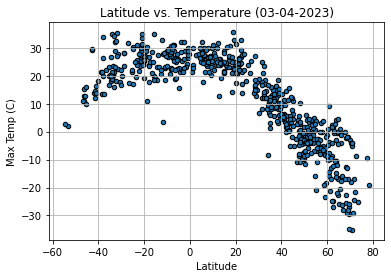

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp',
                    title=f'Latitude vs. Temperature ({today})',
                    xlabel='Latitude', ylabel='Max Temp (C)', marker='o', edgecolors='black',
                    grid=True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig(os.path.join("..","output_data","Fig1.png"))

# Show plot
plt.show()

#### Latitude Vs. Humidity

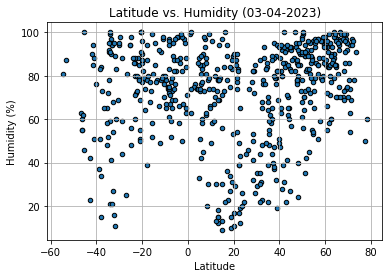

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity',
                    title=f'Latitude vs. Humidity ({today})',
                    xlabel='Latitude', ylabel='Humidity (%)', marker='o', edgecolor='black',
                    grid=True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig(os.path.join("..","output_data","Fig2.png"))

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

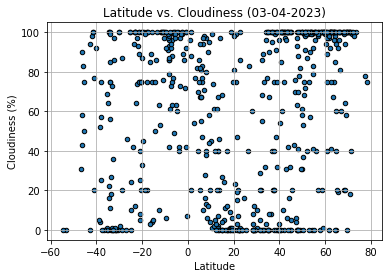

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness',
                    title=f'Latitude vs. Cloudiness ({today})',
                    xlabel='Latitude', ylabel='Cloudiness (%)', marker='o', edgecolor='black',
                    grid=True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig(os.path.join("..","output_data","Fig3.png"))

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

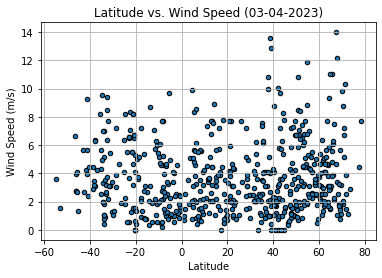

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed',
                    title=f'Latitude vs. Wind Speed ({today})',
                    xlabel='Latitude', ylabel='Wind Speed (m/s)', marker='o', edgecolor='black',
                    grid=True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig(os.path.join("..","output_data","Fig4.png"))

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_reg(x_values,y_values):
    line = np.polyfit(x_values, y_values,1)
    linear_reg_line = np.poly1d(line)
    return linear_reg_line(x_values) # This produces an array of y values between all points along the x-axis


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hambantota,6.1241,81.1185,27.19,83,75,6.17,LK,1677991984
2,puerto carreno,6.1890,-67.4859,27.37,58,77,3.27,CO,1677991986
4,suleja,9.1758,7.1808,24.55,74,58,1.12,NG,1677991989
6,hilo,19.7297,-155.0900,24.04,89,0,2.06,US,1677991991
7,terrace bay,48.7834,-87.1000,-2.44,90,100,1.05,CA,1677991993


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df  = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,25.21,80,100,6.50,PF,1677991983
3,carnarvon,-24.8667,113.6333,30.22,48,0,8.21,AU,1677991987
5,mahebourg,-20.4081,57.7000,25.14,100,75,0.00,MU,1677991990
15,hithadhoo,-0.6000,73.0833,27.79,71,7,1.61,MV,1677992003
17,souillac,-20.5167,57.5167,24.21,100,75,0.00,MU,1677992006


###  Temperature vs. Latitude Linear Regression Plot

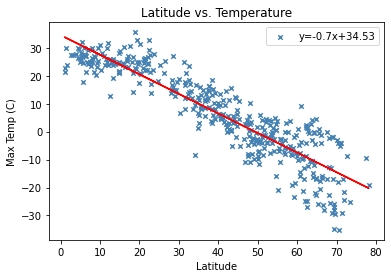

There was a correlation value of: -0.9


In [15]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, stderr = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
northern_hemi_df.plot(kind='scatter', x='Lat', y='Max Temp', label=f'y={round(slope,2)}x+{round(intercept,2)}',
                 title='Latitude vs. Temperature', xlabel='Latitude', ylabel='Max Temp (C)', marker='x', color='steelblue')
n_lat_temp_reg = linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.plot(northern_hemi_df['Lat'], n_lat_temp_reg, color='r')
plt.show()

correlation = round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])[0],2)
print(f"There was a correlation value of: {correlation}")

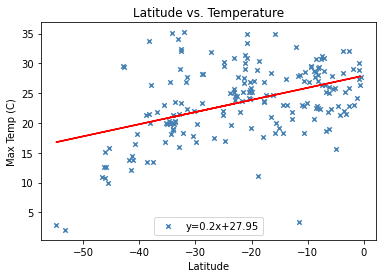

There was a correlation value of: 0.44


In [16]:
# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, stderr = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
southern_hemi_df.plot(kind='scatter', x='Lat', y='Max Temp', label=f'y={round(slope,2)}x+{round(intercept,2)}',
                 title='Latitude vs. Temperature', xlabel='Latitude', ylabel='Max Temp (C)', marker='x', color='steelblue')
s_lat_temp_reg = linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.plot(southern_hemi_df['Lat'], s_lat_temp_reg, color='r')
plt.show()

correlation = round(st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])[0],2)
print(f"There was a correlation value of: {correlation}")

**Discussion about the linear relationship:** It appears there are fairly inverse correlations between the Northern and Southern Hemispheres in terms of Latitude to Temperature. This appears to point to temperatures rising as Latitude approaches the equator at a given point in time.

### Humidity vs. Latitude Linear Regression Plot

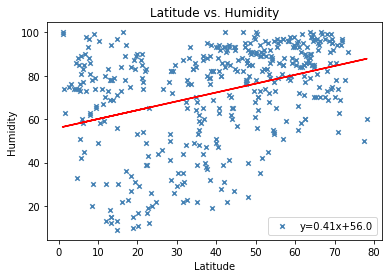

There was a correlation value of: 0.36


In [17]:
# Northern Hemisphere
slope, intercept, r_value, p_value, stderr = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
northern_hemi_df.plot(kind='scatter', x='Lat', y='Humidity', label=f'y={round(slope,2)}x+{round(intercept,2)}',
                 title='Latitude vs. Humidity', xlabel='Latitude', ylabel='Humidity', marker='x', color='steelblue')
n_lat_hum_reg = linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.plot(northern_hemi_df['Lat'], n_lat_hum_reg, color='r')
plt.show()

correlation = round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])[0],2)
print(f"There was a correlation value of: {correlation}")

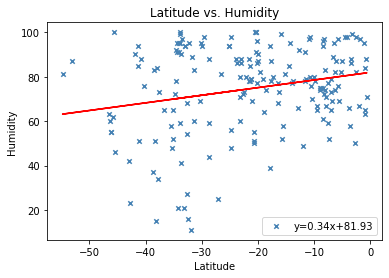

There was a correlation value of: 0.23


In [18]:
# Southern Hemisphere
slope, intercept, r_value, p_value, stderr = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
southern_hemi_df.plot(kind='scatter', x='Lat', y='Humidity', label=f'y={round(slope,2)}x+{round(intercept,2)}',
                 title='Latitude vs. Humidity', xlabel='Latitude', ylabel='Humidity', marker='x', color='steelblue')
s_lat_hum_reg = linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.plot(southern_hemi_df['Lat'], s_lat_hum_reg, color='r')
plt.show()

correlation = round(st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])[0],2)
print(f"There was a correlation value of: {correlation}")

**Discussion about the linear relationship:** It appears that humidity between hemispheres are approximately the same as latitude moves away from the equator in the northern hemisphere, and moving towards the equator in the southern hemisphere. This makes sense as there is some level of humidity anywhere but is more humid closer to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

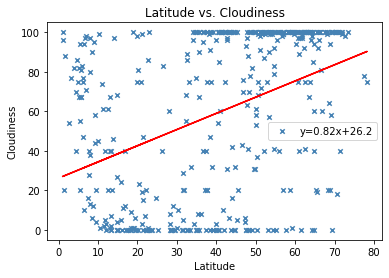

There was a correlation value of: 0.4


In [19]:
# Northern Hemisphere
slope, intercept, r_value, p_value, stderr = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
northern_hemi_df.plot(kind='scatter', x='Lat', y='Cloudiness',label=f'y={round(slope,2)}x+{round(intercept,2)}',
                 title='Latitude vs. Cloudiness', xlabel='Latitude', ylabel='Cloudiness', marker='x', color='steelblue')
n_lat_cloud_reg = linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.plot(northern_hemi_df['Lat'], n_lat_cloud_reg, color='r')
plt.show()

correlation = round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])[0],2)
print(f"There was a correlation value of: {correlation}")

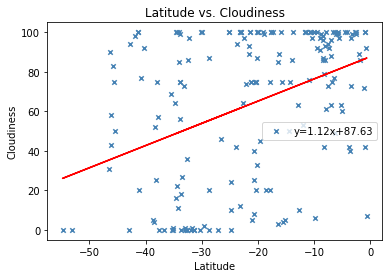

There was a correlation value of: 0.4


In [20]:
# Southern Hemisphere
slope, intercept, r_value, p_value, stderr = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
southern_hemi_df.plot(kind='scatter', x='Lat', y='Cloudiness',label=f'y={round(slope,2)}x+{round(intercept,2)}',
                 title='Latitude vs. Cloudiness', xlabel='Latitude', ylabel='Cloudiness', marker='x', color='steelblue')
s_lat_cloud_reg = linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.plot(southern_hemi_df['Lat'], s_lat_cloud_reg, color='r')
plt.show()

correlation = round(st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])[0],2)
print(f"There was a correlation value of: {correlation}")

**Discussion about the linear relationship:** There appears to be a fairly weak positive correlation between the two hemispheres in terms of cloudiness to latitude. This makes some sense because any point in the world could be covered by clouds or storms at any point in time. This also shows there tends to be more clouds near the equator which makes sense because of tropical storms in a given season.

### Wind Speed vs. Latitude Linear Regression Plot

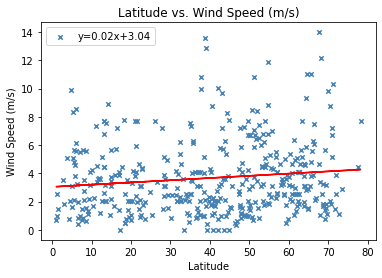

There was a correlation value of: 0.12


In [21]:
# Northern Hemisphere
slope, intercept, r_value, p_value, stderr = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
northern_hemi_df.plot(kind='scatter', x='Lat', y='Wind Speed',label=f'y={round(slope,2)}x+{round(intercept,2)}',
                 title='Latitude vs. Wind Speed (m/s)', xlabel='Latitude', ylabel='Wind Speed (m/s)', marker='x', color='steelblue')
n_lat_wind_reg = linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.plot(northern_hemi_df['Lat'], n_lat_wind_reg, color='r')
plt.show()

correlation = round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])[0],2)
print(f"There was a correlation value of: {correlation}")

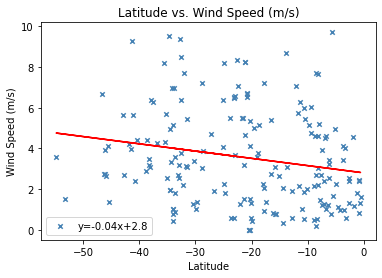

There was a correlation value of: -0.2


In [22]:
# Southern Hemisphere
slope, intercept, r_value, p_value, stderr = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
southern_hemi_df.plot(kind='scatter', x='Lat', y='Wind Speed', label=f'y={round(slope,2)}x+{round(intercept,2)}',
                 title='Latitude vs. Wind Speed (m/s)', xlabel='Latitude', ylabel='Wind Speed (m/s)', marker='x', color='steelblue')
s_lat_wind_reg = linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.plot(southern_hemi_df['Lat'], s_lat_wind_reg, color='r')
plt.show()

correlation = round(st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])[0],2)
print(f"There was a correlation value of: {correlation}")

**Discussion about the linear relationship:** There is very weak correlation here. This makes sense as wind speeds do not tend to be specific to regions. However, the correlation could speak to being closer to the equator as wind speeds may be more consistent and related to tropical storms in a given season.